In [1]:
import pandas as pd
import seaborn as sns

import sys
sys.path.append('../utils')
import classifier_utils

# Load Data

In [2]:
data_path = "../../data/fine-tuning/"

In [3]:
test_df = pd.read_csv(data_path + "moravian_deu_test.csv")
test_df

,source,text,label
0,23,17 waren wir in Manakory,neutral
1,33,"ich grigte auch erlaubniß,",positive
2,11,"Wie mir dabey gewesen, deß waren alle meine Gl...",positive
3,26,In der Stunde machte sich der Heiland mir beka...,positive
4,27,"1744, am vierten Januar, wurde ich nebst meine...",neutral
...,...,...,...
437,9,Die lezte Zeit kränckelte er.,negative
438,38,Ich sahe sie oft auf ihrem Angesicht liegen un...,positive
439,13,Ich bat den Heiland mein Herz mit seinem Blute...,positive
440,34,nie hört’ man dich klagen;,positive


In [4]:
y_true = list(test_df["label"])
y_true

['neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'negative',
 '

# Analyze with Models

In [5]:
def build_confusion_df(y_true, y_predicted, model_name):
    confusion_df = pd.DataFrame({"y_true": y_true, f"y_{model_name}": y_predicted}).groupby(["y_true", f"y_{model_name}"]).size().unstack()
    
    confusion_df = confusion_df.T # transpose to normalize values
    for label, count in dict(pd.DataFrame(y_true)[0].value_counts()).items():
        confusion_df[label] = confusion_df[label] / count
    
    return confusion_df.T # transpose back

def draw_confusion_matrix(y_true, y_predicted, model_name):
    ax = sns.heatmap(build_confusion_df(y_true, y_predicted, model_name), cmap="Blues", annot=True, annot_kws={"fontsize":12}, fmt=".2f", vmin=0, vmax=1)

    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(12)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(12)
    ax.set_xlabel(model_name, fontsize=14)
    ax.set_ylabel("manual", fontsize=14)
    
    return ax

In [6]:
prediction_path = "../../data/predictions/"

## Off-the-shelf Lexicon-based Approaches

### SentiWS

In [7]:
sentiws_path = prediction_path + "moravian_deu_test_SentiWS.csv"
y_sentiws = [classifier_utils.get_label(x) for x in pd.read_csv(sentiws_path)["polarity"]] # build labels from polarity scores
y_sentiws

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 '

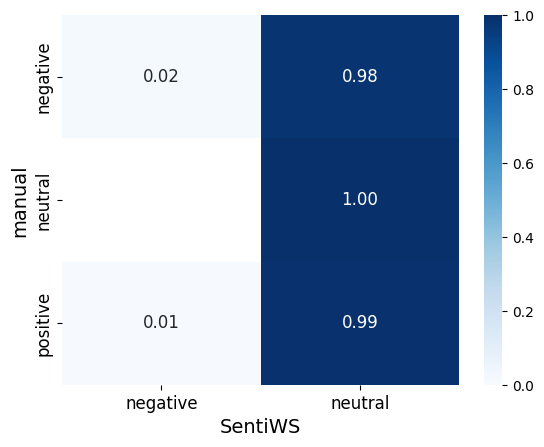

In [8]:
draw_confusion_matrix(y_true, y_sentiws, "SentiWS");

### GerVADER

In [9]:
gervader_path = prediction_path + "moravian_deu_test_GerVADER.csv"
y_gervader = [classifier_utils.get_label(x) for x in pd.read_csv(gervader_path)["polarity"]] # build labels from polarity scores
y_gervader

['neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'neutral',
 'positive',
 'positive',
 'negative',
 'positive',
 'neutral',
 'negative',
 'positive',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 '

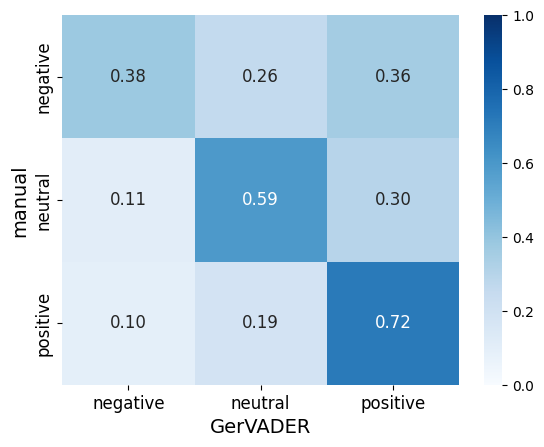

In [10]:
draw_confusion_matrix(y_true, y_gervader, "GerVADER");

## Off-the-shelf Transformer Models

### ger-senti-bert

In [11]:
ger_senti_bert_path = prediction_path + "moravian_deu_test_ger-senti-bert.csv"
y_ger_senti_bert = list(pd.read_csv(ger_senti_bert_path)["label"])
y_ger_senti_bert

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutr

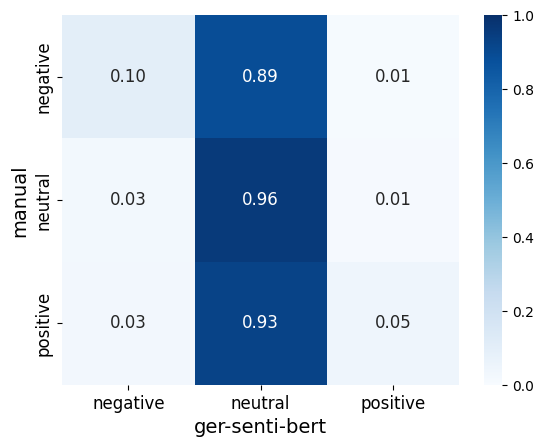

In [12]:
draw_confusion_matrix(y_true, y_ger_senti_bert, "ger-senti-bert");

### senti-distilbert

In [13]:
senti_distilbert_path = prediction_path + "moravian_deu_test_senti-distilbert.csv"
y_senti_distilbert = list(pd.read_csv(senti_distilbert_path)["label"])
y_senti_distilbert

['positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',

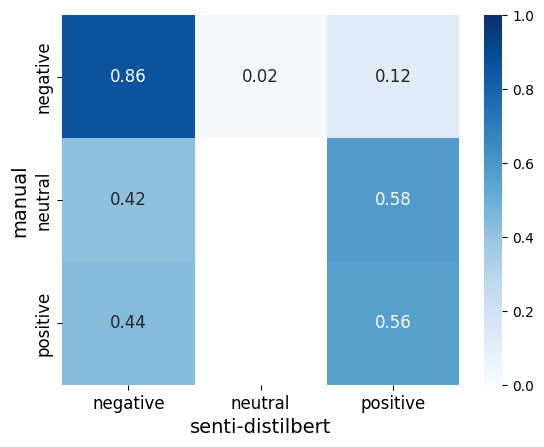

In [14]:
draw_confusion_matrix(y_true, y_senti_distilbert, "senti-distilbert");

## Fine-tuned Models

### bert*

In [15]:
finetuned_bert_path = prediction_path + "moravian_deu_test_bert_fine-tuned.csv"
y_finetuned_bert = list(pd.read_csv(finetuned_bert_path)["label"])
y_finetuned_bert

['neutral',
 'positive',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'neutral',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'p

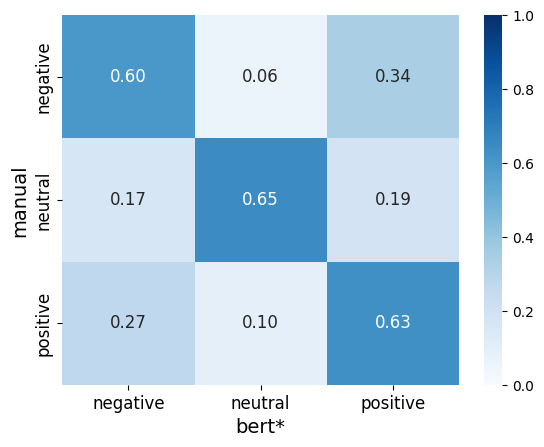

In [16]:
draw_confusion_matrix(y_true, y_finetuned_bert, "bert*");

### gbert*

In [17]:
finetuned_gbert_path = prediction_path + "moravian_deu_test_gbert_fine-tuned.csv"
y_finetuned_gbert = list(pd.read_csv(finetuned_gbert_path)["label"])
y_finetuned_gbert

['neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'negative',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'negative',
 'nega

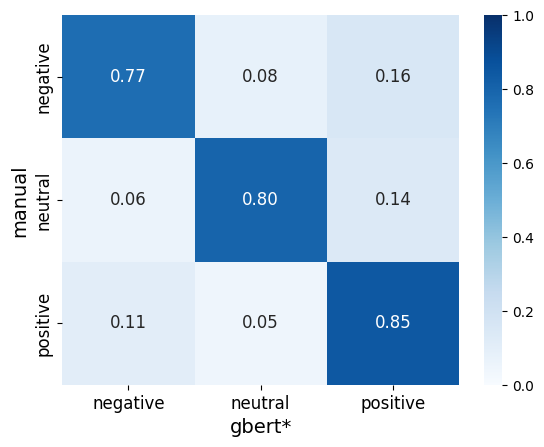

In [18]:
draw_confusion_matrix(y_true, y_finetuned_gbert, "gbert*");

### ger-senti-bert*

In [19]:
finetuned_ger_senti_bert_path = prediction_path + "moravian_deu_test_ger-senti-bert_fine-tuned.csv"
y_finetuned_ger_senti_bert = list(pd.read_csv(finetuned_ger_senti_bert_path)["label"])
y_finetuned_ger_senti_bert

['neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'negative',
 'negative',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'neutral',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'negative',
 'negative',
 

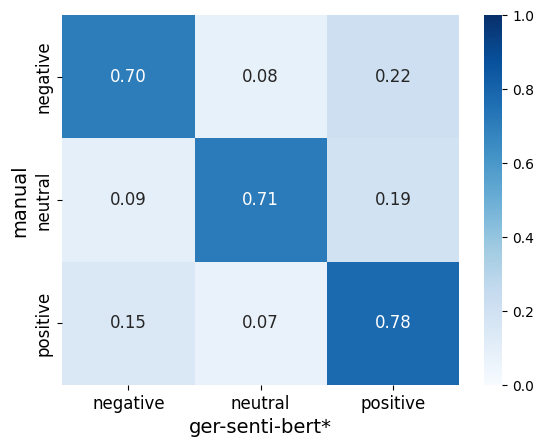

In [20]:
draw_confusion_matrix(y_true, y_finetuned_ger_senti_bert, "ger-senti-bert*");